<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/Exercise_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

In [2]:
# prepare the data
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [25]:
# split data into training and validation
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  4,  8,  1, 10,  7,  6,  2,  9]), tensor([5, 0]))

In [26]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
import torch.nn as nn
# we are defining only one layer of neuron, no activation. This is identical to the linear regression model we developed.
linear_model = nn.Linear(1, 1) # <1>
# doing one forward pass with this model
linear_model(t_un_val) # notice we don't need to pass parameters explicitly

In [ ]:
# check the initial values of the parameters
linear_model.weight

In [ ]:
# check the initial values of the parameters
linear_model.bias

In [31]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 287.8586, Validation loss 30.6377
Epoch 1000, Training loss 3.1370, Validation loss 12.5508
Epoch 2000, Training loss 2.3353, Validation loss 8.1587
Epoch 3000, Training loss 2.3089, Validation loss 7.4895

Parameter containing:
tensor([[5.1931]], requires_grad=True)
Parameter containing:
tensor([-15.9056], requires_grad=True)


In [33]:
# use a built-in loss function
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 302.6339, Validation loss 51.8814
Epoch 1000, Training loss 4.0901, Validation loss 6.4426
Epoch 2000, Training loss 3.2008, Validation loss 3.0338
Epoch 3000, Training loss 3.1719, Validation loss 2.5572

Parameter containing:
tensor([[5.2333]], requires_grad=True)
Parameter containing:
tensor([-16.3154], requires_grad=True)


In [34]:
# add activation layers
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [35]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [36]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [37]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [38]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [39]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2112], requires_grad=True)

In [40]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 246.3293, Validation loss 41.2278
Epoch 1000, Training loss 5.8798, Validation loss 1.5299
Epoch 2000, Training loss 6.6538, Validation loss 3.8280
Epoch 3000, Training loss 3.7779, Validation loss 2.7009
Epoch 4000, Training loss 2.3854, Validation loss 2.1138
Epoch 5000, Training loss 1.9958, Validation loss 2.2798
output tensor([[7.4592],
        [2.4546]], grad_fn=<AddmmBackward0>)
answer tensor([[8.0000],
        [0.5000]])
hidden tensor([[ -0.9224],
        [ -0.0416],
        [ 13.8234],
        [-13.3996],
        [ 13.7161],
        [  0.9539],
        [-13.6398],
        [  0.2470]])


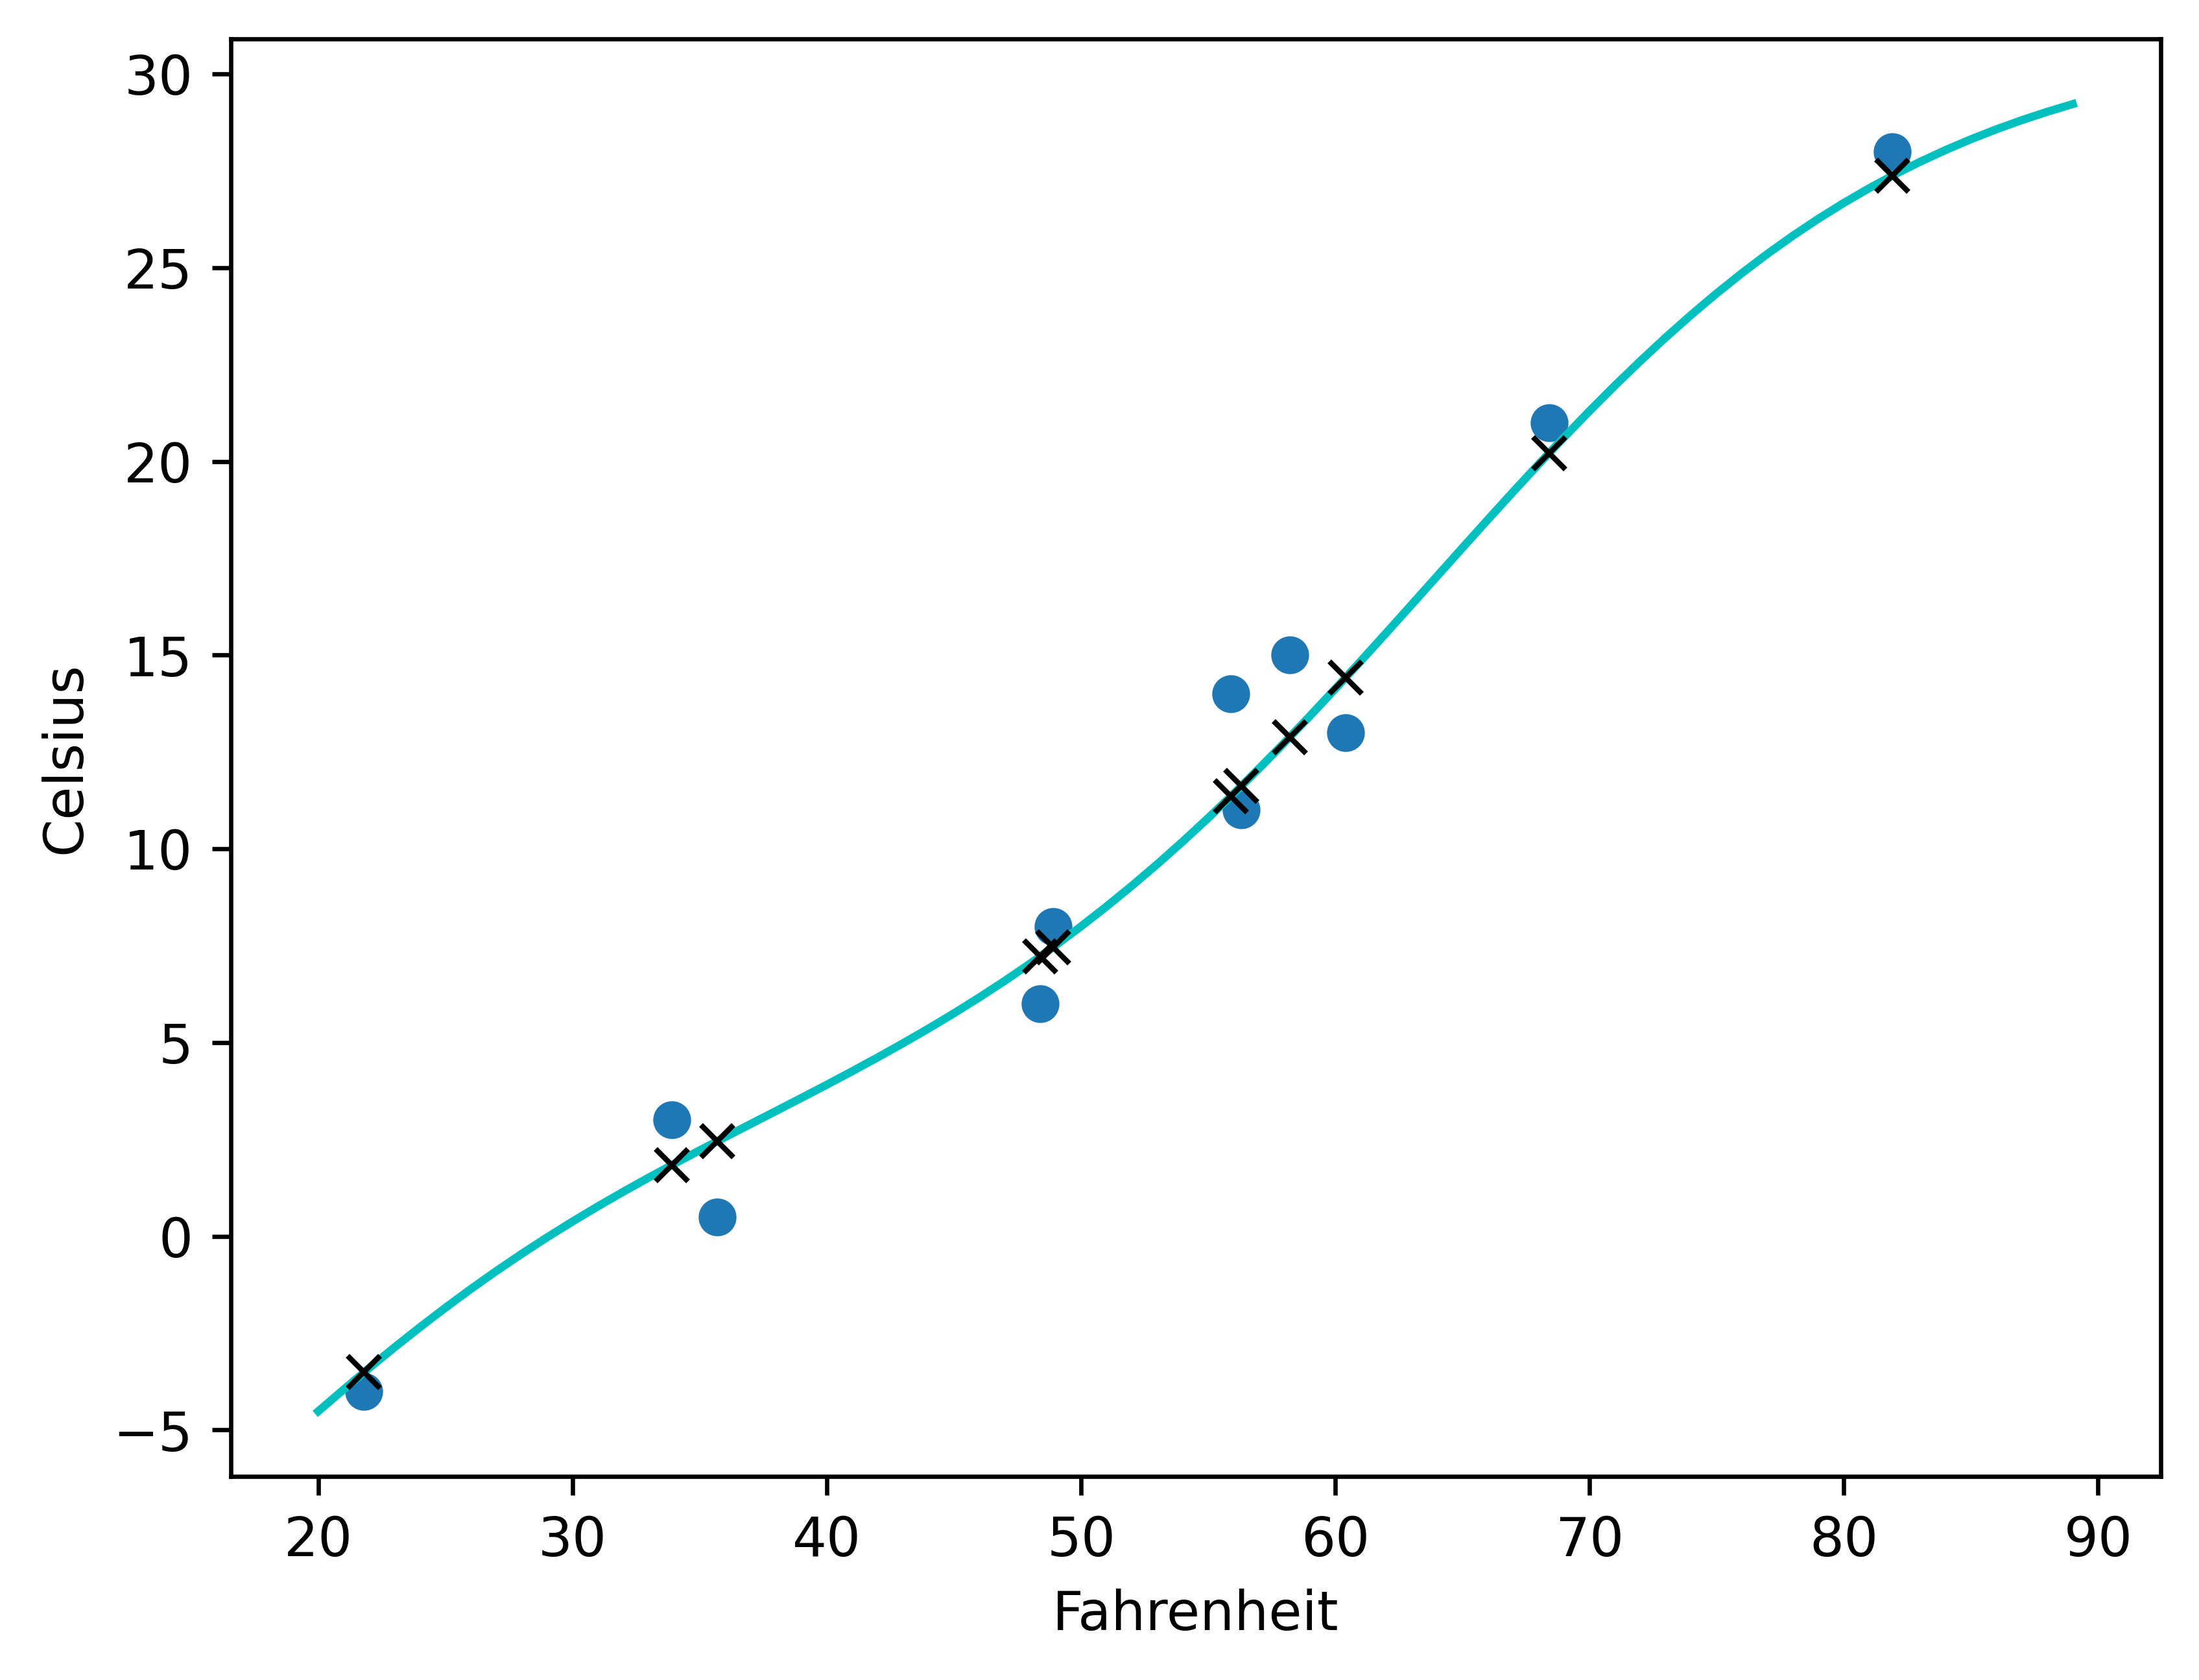

In [41]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 229.8814, Validation loss 34.6765
Epoch 1000, Training loss 59.4063, Validation loss 54.4031
Epoch 2000, Training loss 39.6620, Validation loss 39.7030
Epoch 3000, Training loss 24.7852, Validation loss 24.9686
Epoch 4000, Training loss 15.1614, Validation loss 14.0413
Epoch 5000, Training loss 9.8234, Validation loss 7.5002


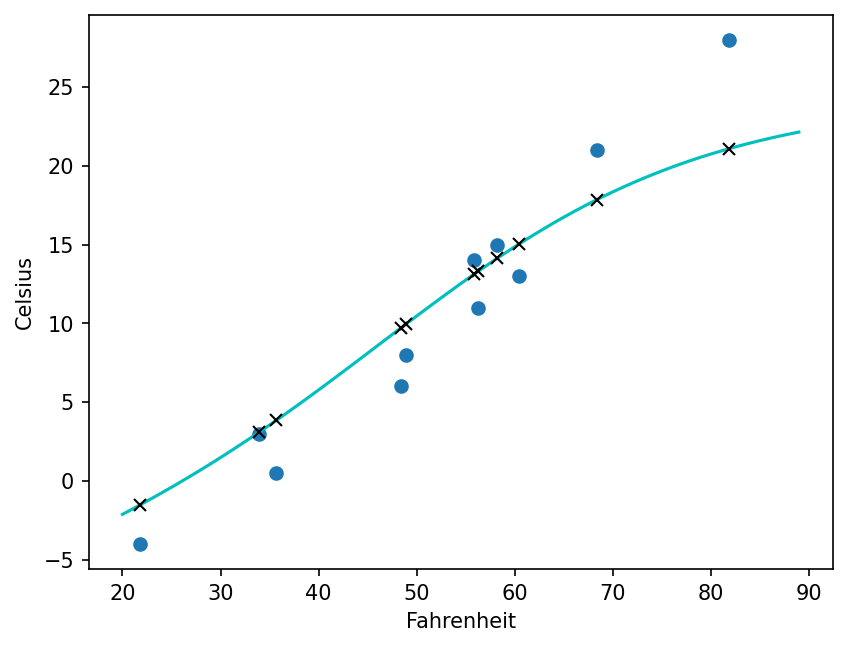

In [42]:
# Exercises here!

neuron_count = 20
# try yourself: rewrite the seq_model for a neuron count of 20 instead of 13
# seq_model =


optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
